In [20]:

import numpy as np

from sklearn.cluster import KMeans


## Generate synthetic data points

In [19]:
np.random.seed(40)

In [21]:
# First group of data points
# x mean around 5, y mean 8
x1 = np.random.normal(15, 1, 20)
y1 = np.random.normal(12, 1, 20)

# Second group of data points
# x mean around 10, y mean around 5
x2 = np.random.normal(10, 1, 20)
y2 = np.random.normal(25, 1, 20)

# Combine data points

X = np.concatenate((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
X.shape

(40, 2)

## Apply K-means

In [22]:
# Number of clusters
k = 2

# Create the K-means object
kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)

# Fit the model to the data
kmeans.fit(X)


KMeans(n_clusters=2, n_init='auto', random_state=42)

In [23]:
# Extract the cluster centers and the labels

centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [24]:
centers

array([[10.11000438, 24.95667357],
       [15.04811201, 11.96583886]])

In [25]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

## Plot the Results

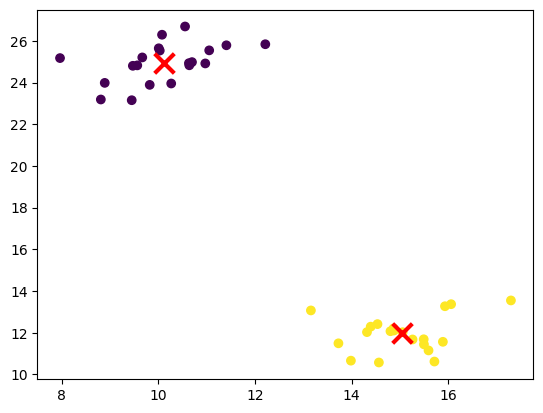

In [26]:
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(X[:,0], X[:,1], c=labels)

# PLot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidth=3, color='r')

plt.show()



# Membership Weighted K-means

In [27]:
import numpy as np

Defind a method for implementing membership weighted K-means

In [35]:

def membership_weighted_kmeans(X, k, weights, max_iters=100):
  """
  X: ndarray of shape (n_samples, n_features), input data
  k: int, number clusters
  weights: ndarray of shape (n_samples, ), membership weights for each data point
  max_iters: int, maximum number of iterations

  return: tumple of (centroids, labels)
  """
  n_samples, n_features = X.shape

  # Initialize the centroids
  centroids = X[np.random.choice(n_samples, k), :]

  for i in range(max_iters):

    # Compute distance matrix and weighted distances

    distances = np.sqrt(np.sum((X[:, np.newaxis, :] - centroids)**2, axis=2))

    weighted_distances = distances * weights[:, np.newaxis]

    # Assign labels to each data point based on closest centroid
    labels = np.argmin(weighted_distances, axis=1)

    # Update centroids
    for j in range(k):
      centroids[j,:] = np.average(X[labels == j, :], axis=0, weights=weights[labels == j])

  return centroids, labels    



## Generate some data points

In [32]:
np.random.seed(100)

n_samples = 1000
dim = 2

X = np.random.randn(n_samples, dim) * 0.5
X.shape


(1000, 2)

In [40]:
# Generate weights

weights = np.abs(X[:, 0])*5

## Apply Membership weighted K-means

In [41]:
centroids, labels = membership_weighted_kmeans(X, k=3, weights = weights)

## Apply classic K-means clustering

In [42]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(X)
centers = kmeans.cluster_centers_
k_labels = kmeans.labels_

## Make a Scatter Plot to Compare the Results

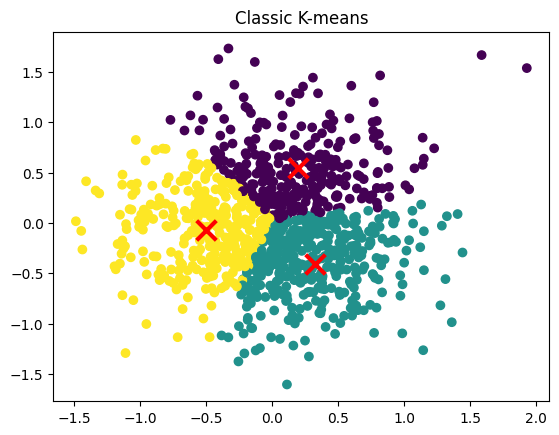

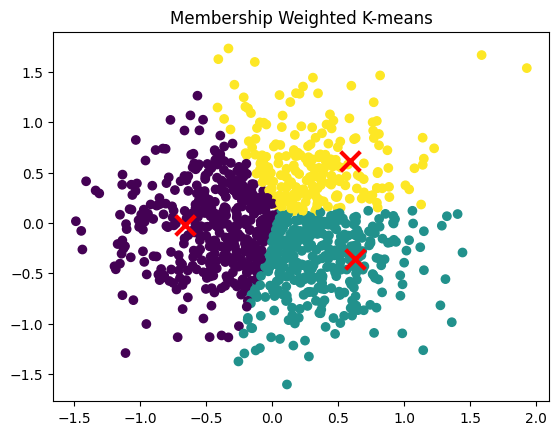

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=k_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidth=3, color='r')
plt.title('Classic K-means')
plt.show()


plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidth=3, color='r')
plt.title('Membership Weighted K-means')
plt.show()


## Let's use another method for weight computation 

In [48]:
X = np.concatenate((np.random.randn(50, 2) * 0.5 + [0, 0], 
                    np.random.randn(50, 2)* 0.5 + [2, 2],
                    np.random.randn(50, 2)* 0.5 + [-2, 2]))
X.shape

(150, 2)

In [49]:
weights = np.random.rand(X.shape[0])

# Define a decaying membership function
decay_rate = 0.5

# compute the decay weights
decayed_weights = np.exp(-decay_rate * np.arange(len(weights)))


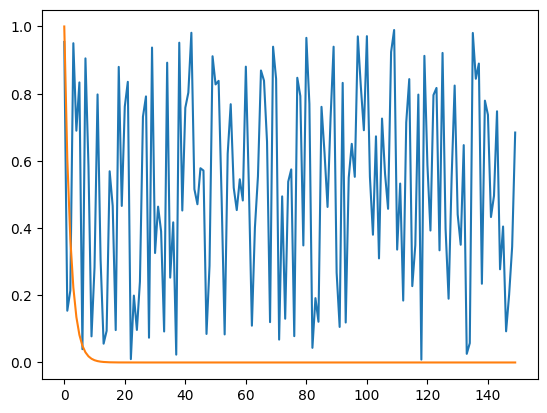

In [50]:
plt.plot(weights)
plt.plot(decayed_weights)
plt.show()

## Apply Membership weighted K-means

In [59]:
centroids, labels = membership_weighted_kmeans(X, k=3, weights = decayed_weights)

## Apply classic K-means clustering

In [52]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(X)
centers = kmeans.cluster_centers_
k_labels = kmeans.labels_

## Make a Scatter Plot to Compare the Results

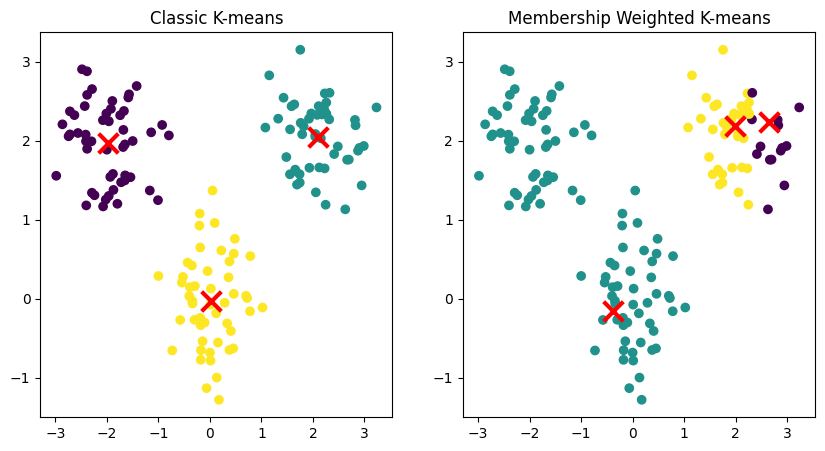

In [60]:

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(X[:, 0], X[:, 1], c=k_labels)
ax[0].scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidth=3, color='r')
ax[0].set_title('Classic K-means')

ax[1].scatter(X[:, 0], X[:, 1], c=labels)
ax[1].scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidth=3, color='r')
ax[1].set_title('Membership Weighted K-means')

plt.show()
